In [30]:
from src.SynthSeg import SynthSeg
from src.Labels import Labels
import pandas as pd

#### Get dataset & labels

In [19]:
labels = Labels().df

data = SynthSeg(
    subjects=labels.index,
    run_qc=False,
    ).df


# Create overall df
labeled_vols = data.join(labels)

labels = labeled_vols["depress_dsm5"]

print(data.shape)
print(labels.shape)

(1782, 101)
(1782,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1336, 101)
(446, 101)


In [23]:
import umap
map = umap.UMAP(n_components=2).fit(X_train, y_train)

In [24]:
test_embed = map.transform(X_test)

In [25]:
test_embed.shape

(446, 2)

In [27]:
data

,total intracranial,left cerebral white matter,left cerebral cortex,left lateral ventricle,left inferior lateral ventricle,left cerebellum white matter,left cerebellum cortex,left thalamus,left caudate,left putamen,...,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula
subject,,,,,,,,,,,,,,,,,,,,,
NDARINVW2RNZLMD,1649660.4,264181.30,326792.25,11447.786,620.537,14525.023,63348.844,8752.133,4876.770,6250.810,...,2993.607,15449.025,21065.236,13822.385,9706.300,11679.445,3933.964,3969.430,2548.986,7339.619
NDARINVW3GNFYF3,1392070.4,214965.12,286622.70,3504.918,394.959,13182.956,58945.152,7323.508,4209.031,5792.698,...,2649.118,10879.962,17310.062,11100.900,8669.546,9428.856,3369.750,3189.750,2238.624,6210.324
NDARINVW49LW8G9,1433559.0,206686.62,301790.88,7910.316,466.657,13678.313,55604.188,7246.027,3282.903,5443.178,...,2330.552,11954.674,16187.843,11657.706,8664.027,8399.713,3228.956,3175.755,2143.267,6007.952
NDARINVW5F6E0EE,1479697.5,222263.19,291813.10,5271.414,383.898,15399.612,67127.430,7627.134,4337.230,6028.418,...,2471.140,13318.326,16277.017,12268.566,9825.352,10241.195,3185.318,3652.712,2167.815,6334.088
NDARINVW5LV1C4M,1438194.8,222185.92,310417.66,3761.936,363.790,12791.351,52488.168,7091.138,4334.090,5710.094,...,2344.945,12508.715,17826.460,12478.840,7882.244,8790.291,3028.630,3453.509,2160.325,6119.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARINV17UGGHGJ,1426056.8,213083.84,299662.94,2378.811,463.855,13504.221,59652.703,6825.936,3493.806,5814.599,...,2543.340,12199.245,15256.049,10713.738,9529.059,9886.811,3210.261,3481.714,2147.387,5966.774
NDARINV19GEFHUC,1268219.5,183327.45,258512.00,3027.287,415.574,13598.274,58523.934,7339.033,3829.564,6183.138,...,2023.214,10962.430,14458.245,9106.913,7314.708,8630.587,3041.230,3048.805,1931.826,5105.627
NDARINV1A1Y0V5X,1454486.0,223467.05,308454.50,3784.484,368.554,13623.069,55462.227,7061.070,3839.372,5815.781,...,2592.041,11861.418,14931.503,11525.587,8700.787,9525.312,3346.874,3336.464,2073.469,5805.587


In [36]:
umap_df = pd.DataFrame(test_embed, columns = ['umap1', 'umap2'])
umap_df['label'] = y_test.values
umap_df['label'] = umap_df['label'].replace({1: 'depressed', 0: 'control'})

umap_df

,umap1,umap2,label
0,-7.158457,2.599775,depressed
1,-6.239721,6.252001,depressed
2,5.778127,14.914879,depressed
3,-6.681129,6.837217,control
4,-5.607581,7.098464,control
...,...,...,...
441,18.394064,2.932412,control
442,14.431330,9.010144,control
443,17.977186,3.654253,control
444,-2.179621,11.220275,control


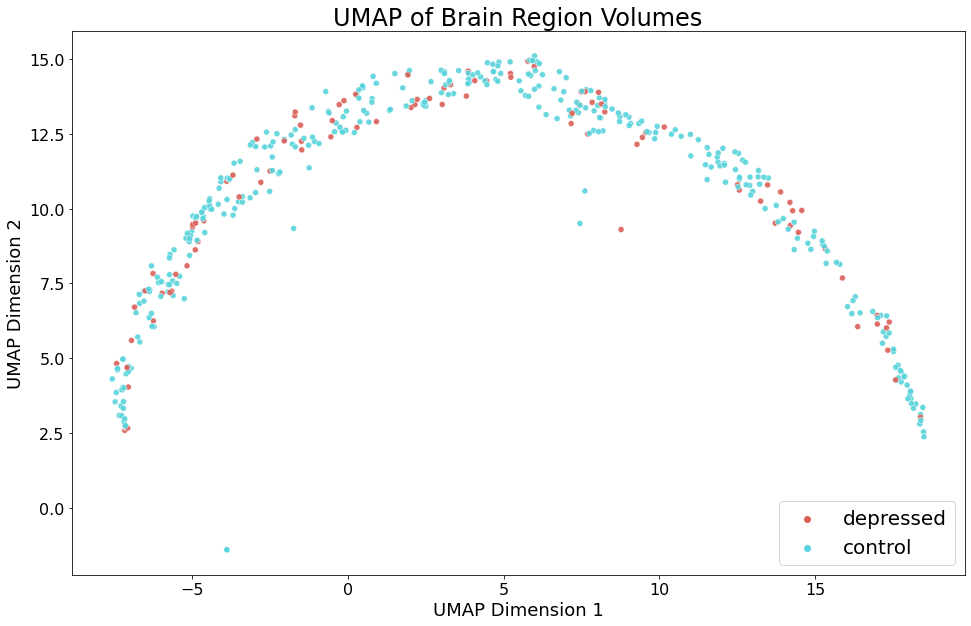

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
import seaborn as sns

sns.scatterplot(
    x="umap1", y="umap2",
    hue="label",
    palette=sns.color_palette("hls", 2),
    data=umap_df,
    legend="full",
    alpha=0.9,
)

plt.title("UMAP of Brain Region Volumes", fontsize=24)
plt.xlabel("UMAP Dimension 1", fontsize=18)
plt.ylabel("UMAP Dimension 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc = "lower right", fontsize=20)